### Inferential Statistics
Overview

This unit teaches the basics of statistical inference, hypothesis testing, regression and correlation and their applications such as in A/B testing. Descriptive statistics are useful for discovering and communicating insights from data. Inferential statistics are useful for drawing conclusions and predicting outcomes. In this course, the focus is on inferential statistics. For students unfamiliar or rusty with the basics of probability and descriptive statistics, Khan Academy’s probability track is a good refresher. 
Learning Objectives

    Understand the fundamentals of statistical inference and hypothesis testing
    Perform hypothesis testing for numeric and categorical data to identify statistical significance
    Understand how hypothesis testing is applied in real-world applications such as A/B testing

Prior Learning Recap

    Be familiar with basic probability and descriptive statistics
    For a refresher use Khan Academy’s Probability track
    Keep your Capstone project 1 cleaned and wrangled data ready for use in this unit

Key Terms & Concepts

    Hypothesis: An assumption made about the world that can be tested using the data
    Statistical Inference: A branch of statistics dedicated to drawing conclusions about the world using smaller data samples.
    Confidence Intervals: An interval estimate used to express the degree of uncertainty associated with a sample statistic. 
    Statistical Significance: An estimate of how likely an event might occur randomly - the smaller the number, the more likely that the observed event has some kind of real-world importance.

Submissions for this unit

    Exploratory Data Analysis Project
    Short report on Applying inferential statistics methods to your Capstone Project 1 data


### For this project, I will compare the mean note durations between Bach Chorales and Various Classical and Romantic String Quartet compositions to test if there is statistically significant evidence.

### Read in Bach data

In [1]:
from music21 import *
from collections import Counter
import pandas as pd
import os

s = 'chord'

# It would be interesting to count the keys in the corpus
Keys = []
TimeSign = []

# Note Lists
NoteDuration = []
NotePitches = []
NoteStrPitches = []
NoteFreq = []
NoteAndDuration= []
path = 'C:\\Users\\qh1444dd\\Desktop\\Bach\\' 
# REPLACE PATH
for filename in os.listdir(path):
    midi = converter.parse(path + filename)
    key = midi.analyze('key')
    Keys.append(key)
    time = midi.recurse().getElementsByClass(meter.TimeSignature)[0]
    TimeSign.append(time)
    for n in midi.flat.notes:
        if not ("chord") in str(n):
            NoteDuration.append(n.beatStrength)
            NotePitches.append(n)
            NoteStrPitches.append(str(n))
            NoteFreq.append(n.ps)
            NoteAndDuration.append([str(n), str(n.beatStrength)])
    else:
        pass

C:\Users\qh1444dd\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: Music21DeprecationWarning: Note._getPs was deprecated on May 2014 and will disappear at or after May 2016. use pitch.ps instead


In [2]:
PitchData = pd.DataFrame.from_dict({'NoteDuration': NoteDuration,
                          'NotePitches': NotePitches,
                          'NoteFreq': NoteFreq,
                          'NoteAndDuration': NoteAndDuration})

In [3]:
PitchData['str_NoteAndDuration'] = PitchData.NoteAndDuration.apply(', '.join)

In [4]:
PitchData.to_csv('PitchDataBach.csv')

In [5]:
PitchData.head()

,NoteAndDuration,NoteDuration,NoteFreq,NotePitches,str_NoteAndDuration
0,"[<music21.note.Note F>, 0.25]",0.25,65.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"
1,"[<music21.note.Note F>, 0.25]",0.25,65.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"
2,"[<music21.note.Note C>, 0.25]",0.25,60.0,<music21.note.Note C>,"<music21.note.Note C>, 0.25"
3,"[<music21.note.Note A>, 0.25]",0.25,57.0,<music21.note.Note A>,"<music21.note.Note A>, 0.25"
4,"[<music21.note.Note F>, 0.25]",0.25,53.0,<music21.note.Note F>,"<music21.note.Note F>, 0.25"


In [6]:
SQ = pd.read_csv("PitchData.csv")

In [7]:
SQ.head()

,NoteAndDuration,NoteDuration,NoteFreq,NotePitches,str_NoteAndDuration
0,"['<music21.note.Note B->', '1.0']",1.000,58,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
1,"['<music21.note.Note B->', '1.0']",1.000,58,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
2,"['<music21.note.Note B->', '1.0']",1.000,58,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
3,"['<music21.note.Note B->', '1.0']",1.000,46,<music21.note.Note B->,"<music21.note.Note B->, 1.0"
4,"['<music21.note.Note F>', '0.125']",0.125,65,<music21.note.Note F>,"<music21.note.Note F>, 0.125"


### Compare the means of the 2 groups

In [8]:
xSQ = SQ.groupby(['NoteDuration', 'NoteFreq'])['str_NoteAndDuration'].count()
xSQ = xSQ.reset_index()
xSQ.columns = ['NoteDuration', 'NoteFreq', 'Count']

In [9]:
x = PitchData.groupby(['NoteDuration', 'NoteFreq'])['str_NoteAndDuration'].count()
x = x.reset_index()
x.columns = ['NoteDuration', 'NoteFreq', 'Count']

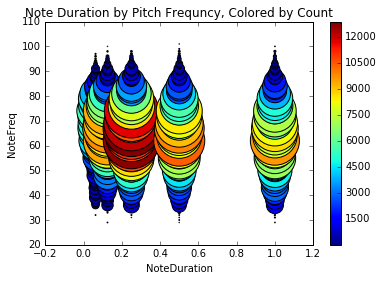

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

points = plt.scatter(xSQ['NoteDuration']
            , xSQ['NoteFreq']
            , c = xSQ['Count']
            , s = (xSQ['Count']/4))

plt.colorbar(points)

sns.regplot("NoteDuration", 'NoteFreq', data=x, scatter=False, fit_reg = False, color = "m")

plt.title("Note Duration by Pitch Frequncy, Colored by Count")

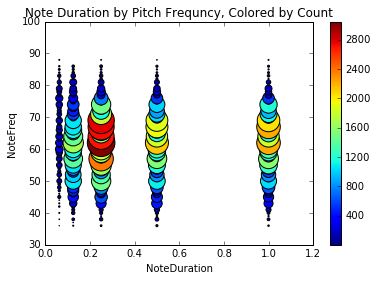

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

points = plt.scatter(x['NoteDuration']
            , x['NoteFreq']
            , c = x['Count']
            , s = (x['Count']/4))

plt.colorbar(points)

sns.regplot("NoteDuration", 'NoteFreq', data=x, scatter=False, fit_reg = False)#, color = .1)

plt.title("Note Duration by Pitch Frequncy, Colored by Count")

In [22]:
import numpy as np
import statsmodels.api as sm
SQ = xSQ['NoteFreq'] 
Bach = x['NoteFreq']
sm.stats.ztest(SQ, Bach)

(2.0300738444884221, 0.04234903371791305)

In [23]:
SQ = xSQ['NoteDuration'] 
Bach = x['NoteDuration']
sm.stats.ztest(SQ, Bach)

(0.19385697366446819, 0.84628787455890331)

### Conculsion

There is evidence of a statistical difference between the note frequencies in the Bach Chorale and the string quartets scrapped for this project. The note frequency is slightly below the normal .05 $\alpha$ value. Personally, considerind the anamolies identified in duration, it seems appropriate to raise the alpha value to $\alpha$ = .10. 

It is also makes sense that the p values for the data tested are on the edge of what would be considered statistically significant based on traditional thresholds, though would commonly be accepted as significant both at the .05 and the .10 levels. It is worth noting that it doesn't appear that triplet subdivisions are evident in the duration values with would likely have pronounced differences to those shown here. 